---

# 8801-CVML Advanced - SS22

## Assignment 4 - Logistische Regression

Dr. Mirco Fuchs, HTWK Leipzig

---

# Logistische Regression mit linear separierbaren Daten

Stellen Sie sich vor, Sie belegen im Rahmen Ihres Studiums an der Fakultät FING der HTWK Leipzig den Kurs "Maschinelles Lernen". Im Laufe des Kurses müssen Sie zwei bewertete Assignments einreichen, um für die Abschlussprüfung zugelassen zu werden. In jedem Assignment können Sie bis zu 100 Punkte erreichen. Auf Basis der von Ihnen in beiden Tests erreichten Punktzahl möchten Sie ermitteln, wie ihre Chancen stehen, den Kurs erfolgreich zu absolvieren. Hierzu liegt Ihnen eine anonymisierte Statistik vergangener Kurse vor, d.h. Informationen darüber, welche Punktzahlen in beiden Tests erreicht wurden und ob der Kurs am Ende erfolgreich bestanden wurde. Diese Daten können Sie zum Trainieren einer logistischen Regression verwenden.

In dieser Aufgabe werden Sie ein Klassifikationsmodell trainieren, das auf Basis der in den Assignments erreichten Punkte die Wahrscheinlichkeit für das Bestehen des Kurses vorhersagt. Für die konkrete Umsetzung werden Sie einerseits das im letzten Assignment für die lineare Regression realisierte Gradient-Descent-Verfahren erweitern. Andererseits werden Sie das Verfahren der logistische Regression mithilfe von sklearn umsetzen.

Die einzelnen Schritte des Assignments sind nachfolgend vorab zusammengefasst:
- Einlesen und Visualisieren der Daten
- Realisierung der Hypothesen-Funktion des logistischen Regressionsverfahrens
- Erweiterung des Gradient-Descent-Verfahrens aus der linearen Regression für die logistische Regression
- Darstellung der Entscheidungsgrenzen des Klassifikationsproblems
- Umsetzung der Logistische Regression linear separierbarer Daten mit sklearn

## Einlesen der Daten
Die historischen Daten liegen in tabellarischer Form in einer txt-Datei vor (`assignment_scores.txt`). Erste und zweite Spalte repräsentieren die im ersten und zweiten Assignment erreichten Punkte, Spalte 3 die Information, ob die Prüfung bestanden wurde. In jeder Zeile befinden sich die zu einer bzw. einem Studierenden gehörenden Daten, die Spalten sind dabei mit einem Komma separiert.

### Aufgabe
Verwenden Sie die numpy-Funktion `genfromtxt()`, um die Tabellendaten in ein numpy-Array einzulesen. Mit dem Argument `delimiter` dieser Funktion können Sie das Textzeichen definieren, das in der Tabelle der txt-Datei zur Spaltentrennung verwendet wurde. Lesen Sie die Daten ein und speichern Sie diese in der Variable `data`. Wir verzichten in diesem Assignment vollständig auf die Trennung von Trainings-, Validierungs- und Testdaten.

### Ergebnis
- **data**:  Daten für das Training der logistischen Regression
- Dimensionen des numpy-Arrays:
  - Spalte 1: Punktzahl im Assignment 1
  - Spalte 2: Punktzahl im Assignment 2
  - Spalte 3: Prüfung bestanden ($y=1$) / nicht bestanden ($y=0$)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Falls Sie in Colab arbeiten, können Sie mit folgender Zeile die beiden Daten-Dateien zunächst hochladen.

In [ ]:
from google.colab import files
uploaded = files.upload()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
data = np.genfromtxt(fname='/content/drive/MyDrive/cvml/assignment_scores.txt',delimiter=',')
print(data[:10])
print(data[:,2])

[[34.62365962 78.02469282  0.        ]
 [30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]
 [45.08327748 56.31637178  0.        ]
 [61.10666454 96.51142588  1.        ]
 [75.02474557 46.55401354  1.        ]
 [76.0987867  87.42056972  1.        ]
 [84.43281996 43.53339331  1.        ]]
[0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0.
 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1.]


## Erstellen der Designmatrix und Extraktion der Zielvariable
Separieren Sie aus den eingelesenen Daten (`data`) Merkmale und Zielvariable und erstellen Sie eine Designmatrix. Die erste Spalte der Designmatrix soll die Elemente `1` enthalten. 

- **t**: Targets/Zielvektor der Trainingsdaten (Dim.: $n \times 1$)
- **X**: Designmatrix der Trainingsdaten (Dim.: $n \times m + 1$)

Funktionen, die hilfreich sein können: np.hstack(), np.ones()

In [30]:
X = np.hstack([np.vstack(np.ones(len(data))),np.vstack(data[:,0]),np.vstack(data[:,1])])
print(X)
t = np.hstack(data[:,2])
print(t)

[[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]
 [ 1.         45.08327748 56.31637178]
 [ 1.         61.10666454 96.51142588]
 [ 1.         75.02474557 46.55401354]
 [ 1.         76.0987867  87.42056972]
 [ 1.         84.43281996 43.53339331]
 [ 1.         95.86155507 38.22527806]
 [ 1.         75.01365839 30.60326323]
 [ 1.         82.30705337 76.4819633 ]
 [ 1.         69.36458876 97.71869196]
 [ 1.         39.53833914 76.03681085]
 [ 1.         53.97105215 89.20735014]
 [ 1.         69.07014406 52.74046973]
 [ 1.         67.94685548 46.67857411]
 [ 1.         70.66150955 92.92713789]
 [ 1.         76.97878373 47.57596365]
 [ 1.         67.37202755 42.83843832]
 [ 1.         89.67677575 65.79936593]
 [ 1.         50.53478829 48.85581153]
 [ 1.         34.21206098 44.2095286 ]
 [ 1.         77.92409145 68.97235999]
 [ 1.         62.27101367

## Visualisierung der Daten
Stellen Sie die Datenpunkte nun in einem Diagramm dar. Erweitern Sie dafür die bereits vorhandene Funktion in der Art, dass die Datenpunkte entsprechend ihre Klassenzugehörigkeit in unterschiedlichen Farben dargestellt werden (blau/rot = bestanden/nicht bestanden). In der bereits vorhandenen Vorlage werden alle Datenpunkte 2 mal dargestellt, einmal in blau einmal in rot.

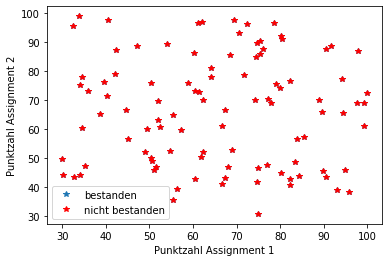

In [31]:
plt.plot(X[:,1],X[:,2],'*',X[:,1],X[:,2],'r*')
plt.xlabel('Punktzahl Assignment 1')
plt.ylabel('Punktzahl Assignment 2')
plt.legend(['bestanden','nicht bestanden'])

## Hypothesenfunktion der logistischen Regression
Die Sigmoid-Funktion ist die Hypothesenfunktion der logistischen Regression. Wir benötigen Sie sowohl zur Realisierung des Gradient-Descent-Verfahrens als auch zur Visualisierung von Entscheidungsgrenzen. Die Hypothesenfunktion ist definiert als

$h_{\mathbf{w}}(\mathbf{x})=g(\mathbf{w^T}\mathbf{x})$

$g(z)=\dfrac{1}{1+e^{-z}}$

In dieser Aufgabe realisieren Sie die nichtlineare Transformation der latenten Variablen `z`.


### Argumente der Funktion
- `z`: latente Variable, Skalar oder Vektor

### Rückgabewert
- $g(z)$
  - Skalar, falls `z` ein Skalar ist
  - Vektor, falls `z` ein Vektor ist, d.h. Anwendung der sigmoid-Funktion auf jedes Element des Vektors

### Hinweise
- Exponentialfunktion: `numpy.exp()`

In [ ]:
def sigmoid(z):
    ...
    return ...

In [ ]:
# Test der sigmoid-Funktion. Die Funktion hat an der Stelle 0 den Funtionswert 0.5
# Der Aufruf sollte sowohl mit einem Skalar als auch mit einem Vektor funktionieren. Im letzteren Fall liefert die Funktion einen Vektor zurück
print(sigmoid(0))
print(sigmoid(np.zeros((3,1))))

## Gradient-Descent-Verfahren für die logistische Regression
Nun soll die Optimierung der Fehlerfunktion zur logistischen Regression mittels Batch-Gradient-Descent erfolgen. Hierfür werden wie bereits bei der linearen Regression zwei Teilfunktionen benötigt. Anschließen erfolgt unter Verwendung dieser Funktionen die Optimierung der Zielfunktion mittels Gradient-Descent.

- **compute_loss(X, t, w)**: Bestimmung des Fehlers des durch den Gewichtsvektor $\mathbf{w}$ parametrierten Modells für einen gebenen Datensatz ($\mathbf{X}$, $\mathbf{t}$)
- **do_gradient_step(X, t, w, alpha, lamda)**: Ausführung eines Gradient-Descent-Optimierungsschrittes und Rückgabe eines neuen Gewichtsvektors $\mathbf{w'}$


### Funktion: compute_loss
Die Funktion ermittelt den Fehler des durch den Gewichtsvektor $\mathbf{w}$ parametrierten Modells der logistischen Regression für einen gebenen Datensatz ($\mathbf{X}$, $\mathbf{t}$). Die Kostenfunktion der logistischen Regression lautet 

$$L(\mathbf{w})=-\dfrac{1}{n}\sum_{i=1}^n t^{[i]}\cdot \log{g(\mathbf{w^T} \mathbf{\overline{x}}^{[i]})} + (1-t^{[i]}) \log{(1-g(\mathbf{w^T} \mathbf{\overline{x}}^{[i]})})$$


bzw. in vektorisierter Form

$$L(\mathbf{w})=-\dfrac{1}{n} \left[ \log\left(g(\mathbf{X}\mathbf{w})\right)^T  \mathbf{t} + \log(\mathbf{1} - g(\mathbf{X}\mathbf{w}))^T (\mathbf{1}-\mathbf{t})\right]$$

Das Symbol $\mathbf{1}$ entspricht einem Zeilenvektor bestehend aus Einsen. Unter Anwendung der Broadcasting-Funktionalität müssen Sie diesen Vektor aber nicht explizit erzeugen.

#### Argumente der Funktion
- **X**: Designmatrix (erweitert mit einem $\mathbf{1}$-Spaltenvektor, Dimensionen: $n \times (m+1)$)
- **t**: Zielvariable ($n x 1$)
- **w**: Vektor der Gewichte ($(m+1) \times 1$)

#### Hinweise
- Logarithmus: `numpy.log()`
- Der Rückgabewert der `numpy.log()`-Funktion ist `inf` für `log(0)` und `nan` für `log(<0)`. Im vorbereiteten Code-Gerüst werden ggf. resultierenden `nan`-Werte in `inf`-Werte überführt, sodass der Rückgabewert der `compute_loss()`-Funktion enweder ein reellwertiger Kostenwert oder alternativ `inf` ist.

In [ ]:
def compute_loss(w, X, t):
    
    ...
    L = ...
    if np.isnan(L):
        return np.inf
    return L

### Funktion: do_gradient_step

Die Funktion führt einen Optimierungsschritt des Batch-Gradient-Descent-Verfahrens mit Regularisierung ($\lambda \geq 0$) und aktualisiert die Parameter des Gewichtsvektors $\mathbf{w}$ entsprechend der Update-Regel. Implementieren Sie die Update-Regel für die logistische Regression entweder als Summenformel oder mithilfe der Matrixnotation (siehe unten). Ausgangspunkt ist dabei die Gradient-Descent-Funktion aus dem Assignment zur linearen Regression, die hier enstprechend zu erweitern ist.

__Argumente der Funktion__:
- **X**: Designmatrix (erweitert mit einem $\mathbf{1}$-Spaltenvektor, Dimensionen: $n \times (m+1)$)
- **t**: Zielvariable ($n x 1$)
- **w**: Vektor der Gewichte ($(m+1) \times 1$)
- **alpha** (**$\alpha$**): Lernrate
- **lamda** (**$\lambda$**): Regularisierungsparameter

__Rückgabewerte__:
  - $\mathbf{w'}$ nach Iterationsschritt
  
__Gradient-Optimierungsschritt__ als Summenformel:

$$\mathbf{w^{'}}=\mathbf{w}-\dfrac{\alpha}{n} \left[ \sum_{i=1}^n \mathbf{\overline{x}}^{[i]}\left(g\left(\mathbf{\overline{x}}^{T^{[i]}} \mathbf{w}\right)-t^{[i]}\right) + \lambda \mathbf{w} \right]$$

__Gradient-Optimierungsschritt__ in Matrixnotation:

$$\mathbf{w'} := \mathbf{w} - \dfrac{\alpha}{n} \left[\mathbf{\overline{X}^T}\left(g\left(\mathbf{\overline{X}}\mathbf{w}\right) - \mathbf{t}\right) + \lambda \mathbf{w}\right]$$

In [ ]:
def do_gradient_step(X, t, w, alpha, lamda):
    n = len(t)
    t = t.reshape(n,1)
    # Erweiterung der nachfolgenden Zeile so, dass sie der Update-Regel der logistischen Regression entspricht
    w = w - alpha/n * (X.T@(X @ w - t) + lamda * w)  
    return w

### Optimierung mit Batch Gradient Descent
Auf Basis der Funktion zur Bestimmung der Kostenfunktion und __eines__ Optimierungsschrittes des Gradient-Descent-Verfahrens kann nun eine iterative Optimierung erfolgen. Dazu kann die bereits im Rahmen der linearen Regression entwickelte Funktion verwendet werden. Führen Sie nachfolgende Zelle aus, um einen optimalen Gewichtsvektors $\mathbf{w}$ durch Minimierung der Fehlerfunktion der logistischen Regression mit dem Batch-Gradient-Descent-Verfahren in `steps` Optimierungsschritten und mit der Lernrate $\alpha$ zu bestimmen. In der Zelle muss kein Code ergänzt werden.

- Variieren Sie die Lernrate und beobachten Sie am Optimierungsergebnis sowie am Verlauf der Kostenfunkion, wie schnell die Optimierung instabil wird und nicht mehr konvergiert, d.h. das kein Minimum mehr gefunden werden kann. Durch die Nichtlinearität der Sigmoid-Funktion ist die Optimierung mit dem Gradient-Descent-Verfahen nicht ideal.
- Variieren Sie zu einem späteren Zeitpunkt die Regularisierung und beobachten Sie für die ermittelten Parameter den Verlauf der Entscheidungsgrenze und wie sich diese verändert.

#### Hinweise
- erwartete Lösung: $\mathbf{w} \approx [-25.2, 0.2, 0.2]^T$ 

In [ ]:
n, d = X.shape
steps =  2000000 # max. Anzahl Interationen
alpha = 0.004 # Lernrate
lamda=1e-8 # regularization: 1e-8 ... 1e2 / 1e-1 = shifted boundary

L_train = np.zeros(steps).reshape(steps, 1)

# Initialisierung der Gewichte mit zufälligen Werten
w = np.random.normal(loc=np.zeros((3,1)), scale=1).reshape(d, 1)

for id, step in enumerate(range(steps)):
    w = do_gradient_step(X, t, w, alpha, lamda)
    L_train[id,0] = compute_loss(w, X, t)

w_opt = w
    
print(w_opt)

plt.plot(range(steps),L_train)
plt.ylabel('log-Error')
plt.xlabel('#Iterations')
plt.legend(['Train Loss'])

### [Optional] Ergänzung zur Optimierung
Eine Alternative zur eigenen Implementierung einer Optimierungsfunktion ist die Verwendung verfügbarer Implementierungen wie beispielsweise der scipy-Funktion `fmin`, in der die Optimierung einer Kostenfunktion nach dem Downhill-Simplex-Verfahren realisiert wird. Dieses spezielle Verfahren nutzt eine Minimierungsstrategie, die völlig ohne Gradienten auskommt. Die folgende Zelle zeigt, wie Sie auf Basis der oben programmierten Kostenfunktion `compute_loss` eine Optimierung umsetzen können.

Weitere Argumente der Minimierungsfunktion, mit denen das Optimierungsverhalten beeinflusst werden kann, finden Sie hier: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html

#### Hinweise
- Unter Umständen erscheint die Warnung, dass die Anzahl maximaler Iterationen erreicht wurde. Die Optimierung bricht dann ab. Führen Sie die Zelle dann weitere Male aus, die Funktion sollte bei richtiger Umsetzung der `compute_loss()`-Funktion häufig konvergieren. Alternativ können Sie mit dem Argrumen `maxiter=` die Anzahl der Iterationen erhöhen.

In [ ]:
from scipy.optimize import fmin
n, d = X.shape

# Initialisierung der Gewichte mit zufälligen Werten
w_init = np.random.normal(loc=np.zeros((3,1)), scale=1).reshape(d, 1)

# Die Argumente der fmin-Funktion sind die "Adresse" der Kostenfunktion `compute_loss`, 
# die Startwerte für die in dieser Funktion zu optimierenden Parameter sowie weitere Parameter, 
# welche für die Kostenfunktion notwendig sind. Das erste Argument der Kostenfunktion muss den zu optimierenden Parametern entsprechen (bei uns w).
w_opt = fmin(compute_loss, w_init, args=(X,t))
print(w_opt)

## Visualisierung der Entscheidungsgrenze
Das Argument $z=\mathbf{w^T}\mathbf{x}$ der Hypothesenfunktion $h_{\mathbf{w}}(\mathbf{x})=g(z)$ können wir als Entscheidungsgrenze interpretieren. Da die Sigmoid-Funktion an der Stelle 0 den Funktionswert 0.5 hat, können wir die Entscheidungsgrenze im Merkmalsraum darstellen, indem wir die lineare Gleichung $z=0=\mathbf{w^T}\mathbf{x}$ nach einem der beiden Merkmale auflösen und die Funktion im Merkmalsraum evaluieren, z.B.
$$x_2 = -\dfrac{w_1}{w_2} x_1 -\dfrac{w_0}{w_2}$$

Wenn wir die Variable $x_1$ nun im Bereich von 0 bis 100 abtasten, können wir entsprechend der Gleichung die zugehörigen Funktionswerte der Entscheidungsgrenze bestimmen und dann visualisieren.

Eine Alternative, die insbesondere bei nichtlinearen Zusammenhängen besser geeignet ist, ist die Evaluierung der Hypothesenfunktion selbst. Da wir als Entscheidungsschwelle zunächst $h_{\mathbf{w}}(\mathbf{x})=0.5$ verwenden, können wir die Hypothesenfunktion für jeden Punkt im Merkmalsraum bestimmen und dann die Stellen visualisieren, an denen der Funktionswert 0.5 beträgt. Dazu ist es erforderlich, den Merkmalsraum im interessanten Bereich von 0 bis 100 (Punkzahlen) entlang jeder Mermalsachse (Punkzahl Assignment 1 & 2) abzutasten und für jede Merkmalskombination den Funktionswert der Hypothesenfunktion zu bestimmen. 

Das Abtasten kann mit der Funktion `np.meshgrid()` erfolgen und ist im nachstehenden Codegerüst schon vorbereitet. Die entstehenden Arrays `xx1` und `xx2` enthalten jeweils 100 Wiederholungen der Vektoren, mit denen der Merkmalsbereich abgetastet wurde. Es entsteht also jeweils eine Matrix der Dimension 100 Abtastwerte x 100 Wiederholungen, also 100 x 100. Im Array `xx1` sind dies Spaltenvektoren, im Array `xx2` Zeilenvektoren. Durch dieses Arrangement finden wir eine spezifische Merkmalskombination (also __einen__ Punkt aller möglichen Kombinationen im Merkmalsraum), in dem wir in beiden Matrizen auf das Element (i,j) zugreifen, d.h. `xx1(i,j)` und `xx2(i,j)` bilden ein Koordinatenpaar im Merkmalsraum.

Ihre Aufgabe ist es, diese 2D-Matrizen in 1D-Vektoren umzuwandeln (d.h. eine Parameterkombination findet sich dann jeweils in der gleichen Zeile der Vektoren) und dann für jede der Parameterkombinationen die Hypothesenfunktion zu bestimmen. Sie erhalten also einen Vektor der Hypothesenfunktion mit 10.000 Elementen. Das Codegerüst wird diesen Vektor analog zu den Arrays `xx1` und `xx2` in ein 2D-Array umwandeln. Anschließend werden mithilfe der Funktion `contour()` alle diejenigen Orte visualisiert, an denen sich als Funktionswert der Hypothesenfunktion 0.5 ergibt, d.h. unsere Entscheidungsgrenze.


### Hinweise
- Ein Array kann mit der Funktion np.ravel() bzw. np.flatten() kollabiert werden, d.h. in ein 1D-Array umgewandelt werden

In [ ]:
def plot_decision_boundary(w_opt, X, t):
    x1 = np.linspace(X[:,1].min(),X[:,1].max(),100)
    x2 = np.linspace(X[:,2].min(),X[:,2].max(),100)

    xx1, xx2 = np.meshgrid(x1, x2)

    h = sigmoid(#<Your code here>)

    hh = h.reshape(xx1.shape)

    plt.plot(X[t==1,1],X[t==1,2],'*',X[t==0,1],X[t==0,2],'r*')
    plt.contour(xx1,xx2,hh,[0.5])
    plt.xlim([X[:,1].min(),100])
    plt.ylim([X[:,2].min(),100])
    plt.xlabel('Punktzahl Assignment 1')
    plt.ylabel('Punktzahl Assignment 2')
    plt.legend(['bestanden','nicht bestanden'])
    
plot_decision_boundary(w_opt, X, t)

## Logistische Regression mit sklearn
Die logistische Regression ist als Machine-Learning-Modell in sklearn verfügbar. Unter Verwendung dieser Funktion soll hier die Lösung des bereits oben betrachteten Klassifikationsproblems bestimmt werden.

__Teilaufgaben__:
  - Realisierung der logistischen Regression mit sklearn
    - Instanziieren eines Modell der logistischen Regression mit `LogisticRegression()`
    - Trainieren des Modells mit der `fit()`-Funktion
    - Speichern der ermittelten Modellparameter in der Variable `w_opt`
  - Darstellung der Entscheidungsgrenze auf Basis der oben programmierten Funktion `plot_decision_boundary()`
  - Ausgabe der Performance auf den Trainingsdaten in Form eines "Klassifikationsberichts" (siehe Hinweise)
    
__Hinweise__:
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- __Beachte__: Der uns bekannte Regularisierungsparameter $\lambda$ wird in der logistischen Regressionsfunktion in sklearn über den Parameter `C` realisiert, der allerings __umgekehrt proportional__ zur Regularisierung ist! D.h. ein großer Wert entspricht geringer Regularisierung und umgekehrt.
- Wenn in der Design-Matrix in der ersten Spalte bereits der 1er-Vektor für den notwendigen Offset ergänzt wurde, muss das Modell mit dem Argument `fit_intercept=False` optimiert werden. Ansonsten ist das Argument `fit_intercept=True` erforderlich.
- Den durch das Modell ermittelten Offset sowie die ermittelten Gewichte der Merkmale sind in den Variablen `<model>.intercept_` und `<model>.coef_` verfügbar
- Klassifikationsbericht: Funktion `classification_report()` aus dem metrics-Modul von sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Instanziiere ein Modell
m_lr = ...

# Trainiere das Modell
#<Your code here>

# Speichere die ermittelten Parameter
w_opt = 
print(w_opt)

# Zeige Entscheidungsgrenze an
#<Your code here>

# Gib die Performance des Modells auf den Trainingsdaten an
# <Your code here>

# Logistische Regression nicht linear separierbaren Daten mit sklearn
In diesem zweiten fiktiven Szenario soll ein logistisches Regressionsmodell mit sklearn zur Klassifikation nichtlinearer Merkmale realisiert werden.
Als Datenquelle dient ebenfalls eine txt-Datei. Sie beinhaltet Daten über das Ergebnis zwei verschiedener Tests, denen Microchips im Rahmen einer Qualitätsprüfung unterzogen werden. Aus den Ergebnissen der Tests soll vorhergesagt werden, ob ein Microchip verkauft werden kann oder aussortiert werden sollte. Die historischen Daten enthalten das Ergebnis, das einzelne Chips in diesen beiden Tests erreicht haben und eine Information darüber, ob die Produkte im Einsatz nach kurzer Zeit ausgefallen sind. Der Zusammenhang zwischen den Merkmalen und den Klassenzuordnungen ist im Gegensatz zum oben stehenden Beispiel nichtlinear.

## Einlesen der Daten
Verwenden Sie für das Einlesen der Daten die gleiche Lösung wie für den weiter oben bearbeiteten Datensatz mit linear separierbaren Klassen! Die Daten befinden sich in der Datei `microchip_tests.txt`

### Ergebnis
- **data**:  Daten für das Training der logistischen Regression
- Dimensionen des numpy-Arrays:
  - Spalte 1: Funktionstest 1
  - Spalte 2: Funktionstest 2
  - Spalte 3: Qualitätskontrolle des Chips bestanden  ($y=1$) oder nicht bestanden ($y=0$)

In [ ]:
data = 
print(data[:10], ...)

## Erstellen der Designmatrix und Extraktion der Zielvariable
Separieren Sie aus den eingelesenen Daten (`data`) Merkmale und Zielvariable und erstellen Sie eine Designmatrix. __Verzichten Sie diesemal auf das Einfügen einer zusätzlichen Spalte mit den Elementen `1`!__
Verwenden Sie ansonsten ebenfalls die bereits weiter oben entwickelte Lösung.

- **t**: Targets/Zielvektor der Trainingsdaten (Dim.: $n \times 1$)
- **X**: Designmatrix der Trainingsdaten (Dim.: $n \times m$)

In [ ]:
# <Your MODIFIED code from above>

## Visualisierung der Daten
Die Visualisierung der Datenpunkte erfolgt ebenfalls genau wie zuvor. Kopieren Sie ihre Lösung von oben und passen Sie diese an (die Spaltenindizes sind aufgrund der fehlenden Spalte mit Einsen anders) und stellen Sie die Datenpunkte entsprechend ihrer Klassenzugehörigkeit zum Aussortieren (rot) und für den Verkauf geeignet (blau) dar. 

In [ ]:
# <Your Code from above>
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['verkaufen','aussortieren'])

## Generieren nichtlinearer Merkmale
Ganz offensichtlich können wir in diesem Beispiel keine lineare Separierung der Klassen vornehmen. Um eine nichtlineare Grenze zwischen den einigermaßen konzentrisch angeordneten Klassen zu bestimmen, können wir unsere Merkmale in einen höher dimensionalen Merkmalsraum mit nichtlinearen Basisfunktionen transformieren, in dem dann eine lineare Separierung möglich ist. Konkret soll jedes ursprüngliche Merkmal in polynomiale Merkmale bis zur Ordnung $p$ transformiert und jeweils gemeinsam mit allen polynomialen Merkmalen des anderen Merkmals ein neues nichtlineares Merkmal bilden. Für genau diese Operation existiert im `preprocessing`-Modul von sklearn die Klasse `PolynomialFeatures`.

Um diese Klasse zu verwenden, muss genau wie bei einem Machine-Learning Modell ein Objekt der Klasse instanziiert werden. Anschließend werden beim Aufruf der `fit_transform`-Funktion die ihr übergebenen Daten entsprechend der Initialisierung transformiert. Der nachstehende Code realisiert genau diese Funktionalität. 

Variieren Sie die Ordnung der Polynome und werfen Sie einen Blick auf die Dimension und die Elemente der neuen Merkmalsmatrix. Betrachten Sie dabei u.a. auch die erste Spalte.



In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=6)
XX = poly.fit_transform(X);

# shape von XX und Elemente von XX betrachten
# <Your Code here>

## Logistische Regression mit sklearn
Trainieren Sie nun mit den nichtlinearen Merkmalen ein logistisches Regressionsmodell. Die grundsätzliche Vorgehensweise ist analog zur Lösung, die in der ersten Teilübung weiter oben entwickelt wurde. __Die Entscheidungsgrenze stellen wir noch nicht dar.__

__Teilaufgaben__:
  - Realisierung der logistischen Regression mit sklearn
    - Instanziieren eines Modell der logistischen Regression mit `LogisticRegression()`
    - Trainieren des Modells mit der `fit()`-Funktion
    - Speichern der ermittelten Modellparameter in der Variable `w_opt`
  - Ausgabe der Performance auf den Trainingsdaten in Form eines Klassifikationsberichts
    
__Hinweise__:
- Eventuell wird eine Warnung ausgegeben, dass der Optimierungsalgorithmus die maximale Anzahl an Iterationen erreicht hat und dadurch beendet wurde. Mit dem Argument `max_iter=` kann die maximale Anzahl an Iterationsschritten variiert werden.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Instanziiere ein Modell
m_lr = ...

# Trainiere das Modell
#<Your code here>

# Speichere die ermittelten Parameter
w_opt = 
print(w_opt)

# Gib die Performance des Modells auf den Trainingsdaten an
# <Your code here>

## Nichtlineare Entscheidungsgrenze visualisieren
Die oben bereits programmierte Funktion `plot_decision_boundary()` kann nicht unmittelbar zur Visualisierung der Entscheidungsgrenze verwendet werden. Das liegt daran, dass die Funktion für die jeweilige Merkmalskombination nur lineare 

Erweitern Sie das unten stehende Code-Gerüst so, dass aus den generierten Merkmalsvektoren `xx1` und `xx2` zunächst polynomiale Merkmale erzeugt werden, bevor die Hypothesenfunktion bestimmt wird. Um dies umzusetzen besitzt die neue Funktion `plot_decision_boundary_nonlinear()` nun ein weiteres Argument namens `poly`, wobei es sich um einen Zeiger auf das weiter oben instanziierte Objekt der Klasse PolynomialFeatures handelt. Innerhalb der neuen Funktion können Merkmale also ebenfalls mit der Funktion `poly.fit_transform()` transformiert werden.

Sobald die Entscheidungsgrenze visualisiert wird, verändern Sie das logistische Regressionsmodell durch Anpassung des Regularisierungsparameters (`C`) und beobachten Sie, wie sich die Entscheidungsgrenze ändert. Veränderung Sie außerdem die Anzahl der für das Modell verwendeten polynomialen Merkmale (Ordnung der Polynome anpassen).

In [ ]:
def plot_decision_boundary_nonlinear(w_opt, X, t, poly):

    x1 = np.linspace(X[:,1].min(),X[:,1].max(),100)
    x2 = np.linspace(X[:,2].min(),X[:,2].max(),100)

    xx1, xx2 = np.meshgrid(x1, x2)

    h = sigmoid(#<Your MODIFIED code from above)
    
    hh = h.reshape(xx1.shape)
    
    plt.plot(X[t==1,1],X[t==1,2],'*',X[t==0,1],X[t==0,2],'r*')
    plt.contour(xx1,xx2,hh,[0.5])
    plt.xlim(-1,1)
    plt.ylim(-1,1.3)
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend(['verkaufen','aussortieren'])
    
plot_decision_boundary_nonlinear(w_opt, XX, t, poly)